In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
x=np.random.normal(scale=2,size=150)
x2 =x+np.random.normal(scale=0.5,size=150)

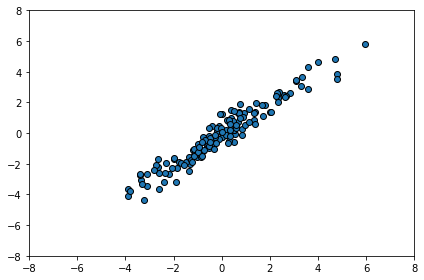

In [161]:
fig, axes = plt.subplots()

axes.set_xlim(-8,8)
axes.set_ylim(-8,8)

axes.scatter(x,x2)

fig.tight_layout()

fig.savefig('exemplo_PCA.png')

In [162]:
df = pd.DataFrame({'x':x,'x2':x2})
df.head()

,x,x2
0,-1.875180,-2.251372
1,-0.620983,-0.909450
2,0.938287,1.298058
3,-0.313364,-0.631886
4,-2.664084,-2.212177


In [163]:
df.cov()

,x,x2
x,3.522659,3.495494
x2,3.495494,3.741949


In [164]:
cov_1 = df.cov()

In [165]:
u, s, vh = np.linalg.svd(cov_1, full_matrices=True)

In [166]:
u

array([[-0.69593384, -0.71810591],
       [-0.71810591,  0.69593384]])

In [167]:
np.diag(s)

array([[7.12951673, 0.        ],
       [0.        , 0.13509097]])

In [168]:
vh

array([[-0.69593384, -0.71810591],
       [-0.71810591,  0.69593384]])

In [169]:
np.matmul((np.matmul(u,np.diag(s))),vh)

array([[3.52265859, 3.49549365],
       [3.49549365, 3.74194911]])

In [170]:
x_pca = np.matmul(df,vh)

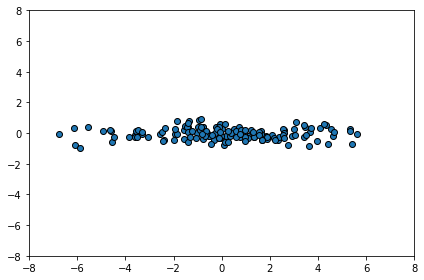

In [173]:
fig, axes = plt.subplots()

axes.set_xlim(-8,8)
axes.set_ylim(-8,8)

axes.scatter(x_pca['x'],x_pca['x2'])

fig.tight_layout()

fig.savefig('X_PCA.png')

In [174]:
theta = vh[0,1]/vh[0,0]

In [175]:
np.rad2deg(np.arctan(theta))

45.89832111775741

In [176]:
def x_rotation(theta,x):
    return theta*x

In [177]:
x_plano = np.asarray([0.0,5])
x_rotation(theta,x_plano)

array([0.        , 5.15929723])

In [178]:
def y_rotation(theta,x):
    return (theta+np.pi/2)*x

In [179]:
x_plano_2 = np.asarray([0.0,1])

In [180]:
x_rotation(theta,x_plano_2)

array([0.        , 1.03185945])

In [181]:
x_rotation(theta,x_plano_2)[1]/theta

1.0

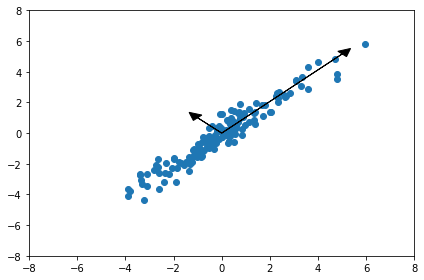

In [182]:
fig, axes = plt.subplots()

axes.set_xlim(-8,8)
axes.set_ylim(-8,8)

#plt.plot(x_plano,x_rotation(theta,x_plano),color='black',lw=2)

plt.arrow(0,0,5,x_rotation(theta,x_plano)[1], head_width=0.5, head_length=0.5, fc='k', ec='k')

plt.arrow(0,0,-1,x_rotation(theta,x_plano_2)[1]/theta, head_width=0.5, head_length=0.5, fc='k', ec='k')

axes.scatter(df.x,df.x2)

fig.tight_layout()

fig.savefig('X_PCA_base.png')

In [183]:
s2 = np.copy(s)

In [184]:
s2[1]=0

In [187]:
np.matmul(np.matmul(u,np.diag(s2)),vh)

array([[3.45299541, 3.56300593],
       [3.56300593, 3.67652133]])

In [193]:
x_pca

,x,x2
0,2.921725,-0.220228
1,1.085244,-0.186985
2,-1.585128,0.229573
3,0.671842,-0.214722
4,3.442603,0.373566
...,...,...
145,0.964995,0.192113
146,-0.397706,-0.103783
147,-0.805437,-0.064646
148,-2.372193,0.344123


In [197]:
vh_f = np.copy(vh)

In [198]:
vh_f[1:]=0
vh_f

array([[-0.69593384, -0.71810591],
       [ 0.        ,  0.        ]])

In [203]:
s2

array([7.12951673, 0.        ])

In [205]:
X_filter=np.matmul(np.matmul(u,np.diag(s2)),vh)

In [214]:
X=np.matmul(Y,np.linalg.inv(vh))

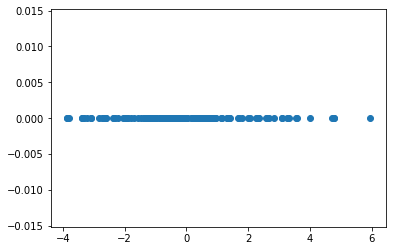

In [215]:
plt.scatter(X.x,X.x2)

In [131]:
print('Contribuição de cada componente')
s/np.sum(s)

Contribuição de cada componente


array([0.98140423, 0.01859577])

In [220]:
from sklearn.datasets import load_iris
import seaborn as sns

In [218]:
iris = load_iris()

In [222]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [255]:
df['target'] = iris.target

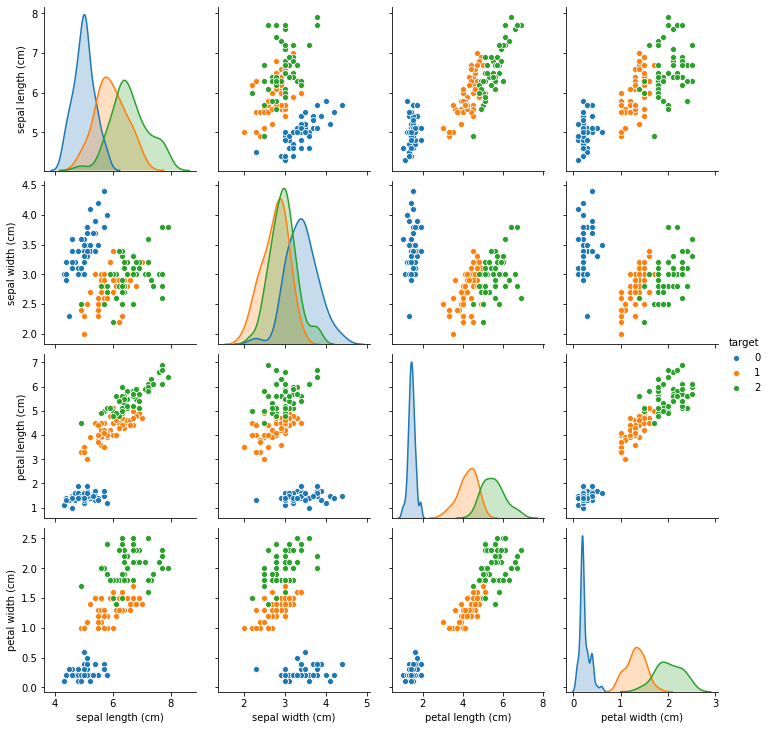

In [226]:
sns.pairplot(df,hue='target')

In [227]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [228]:
scaler = StandardScaler(with_std=False)
scaler.fit(df[df.columns[:-1]])

StandardScaler(copy=True, with_mean=True, with_std=False)

In [229]:
pca = PCA()

In [230]:
pca.fit(scaler.transform(df[df.columns[:-1]]))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [244]:
df_PCA = pd.DataFrame(pca.transform(df[df.columns[:-1]]),columns=['PC1','PC2','PC3','PC4'])

In [245]:
df_PCA['target']=df.target
df_PCA.head()

,PC1,PC2,PC3,PC4,target
0,2.818240,5.646350,-0.659768,0.031089,0
1,2.788223,5.149951,-0.842317,-0.065675,0
2,2.613375,5.182003,-0.613952,0.013383,0
3,2.757022,5.008654,-0.600293,0.108928,0
4,2.773649,5.653707,-0.541773,0.094610,0


In [265]:
df[df.columns[:4]].var()/df[df.columns[:4]].var().sum()

sepal length (cm)    0.149945
sepal width (cm)     0.041544
petal length (cm)    0.681458
petal width (cm)     0.127053
dtype: float64

In [246]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [258]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

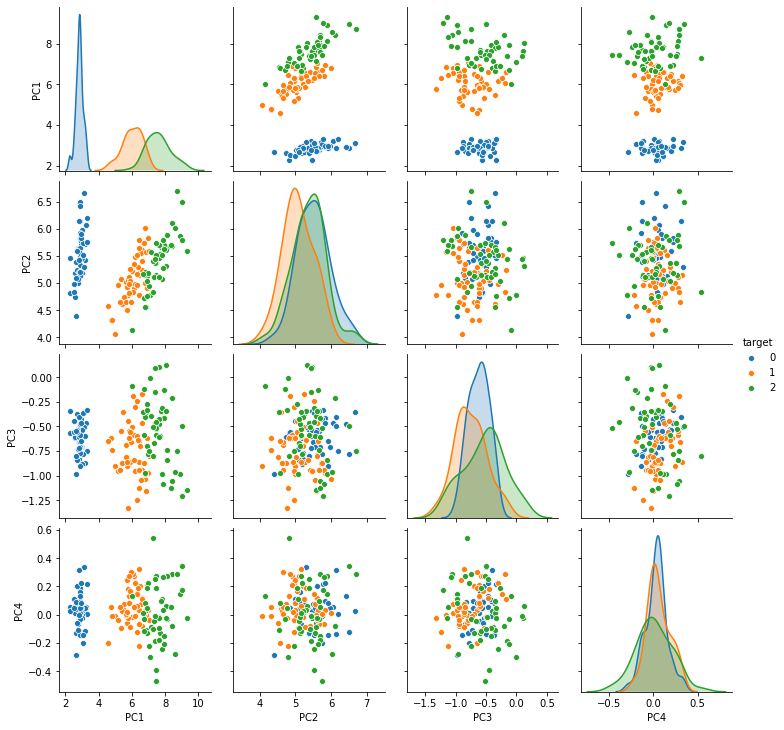

In [257]:
sns.pairplot(df_PCA,vars=['PC1','PC2','PC3','PC4'],hue='target')

AttributeError: module 'numpy' has no attribute 'corr'

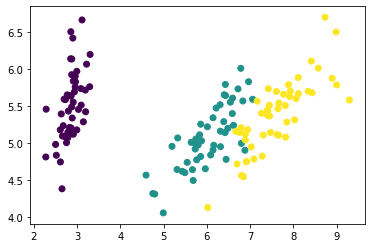

In [243]:
plt.scatter(df_PCA[0],df_PCA[1],c=df.target)